<a href="https://colab.research.google.com/github/comojin1994/Deep_Learning_Study/blob/master/Kaggle/Kaggle_Cactus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0

In [2]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%cd ./gdrive/My\ Drive/Deep_learning/Kaggle/Aerial_Cactus_identification/Input/train

/content/gdrive/My Drive/Deep_learning/Kaggle/Aerial_Cactus_identification/Input/train


### Load Library

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, math
from tensorflow.keras import layers, datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from datetime import datetime
from tqdm import tqdm_notebook
from glob import glob
from PIL import Image
%matplotlib inline
# %load_ext tensorborad
print(tf.__version__)

2.0.0


### Data explore

In [5]:
# train_dir = 'Input/train/'
test_dir = '../test'
csv_path = '../train.csv'
df = pd.read_csv(csv_path)
df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [6]:
# filenames = df['id']
# file_paths = [os.path.join(train_dir, fname) for fname in filenames]
# file_paths[:5]

['Input/train/0004be2cfeaba1c0361d39e2b000257b.jpg',
 'Input/train/000c8a36845c0208e833c79c1bffedd1.jpg',
 'Input/train/000d1e9a533f62e55c289303b072733d.jpg',
 'Input/train/0011485b40695e9138e92d0b3fb55128.jpg',
 'Input/train/0014d7a11e90b62848904c1418fc8cf2.jpg']

In [6]:
train_df = pd.DataFrame(data={'id': df['id'], 'has_cactus': df['has_cactus']})
train_df = train_df.astype(np.str)
train_df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [7]:
len(train_df)

17500

In [8]:
train_df = train_df[:-3750]
validation_df = train_df[-3750:]
len(train_df), len(validation_df)

(13750, 3750)

In [9]:
path = train_df['id'][0]
path

'0004be2cfeaba1c0361d39e2b000257b.jpg'

(32, 32, 3)


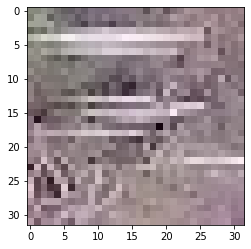

In [10]:
img_pil = Image.open(path)
image = np.array(img_pil)
print(image.shape)
plt.imshow(image)
plt.show()

### Model Training

In [0]:
# Hyperparameters
num_epochs = 10
batch_size = 32
input_shape = (32, 32, 3)
num_classes = 2
learning_rate = 0.001
dropout_rate = 0.25

loss_ftn = tf.keras.losses.sparse_categorical_crossentropy
metrics = ['accuracy']
optm = tf.keras.optimizers.Adam(learning_rate)

In [12]:
# Model
inputs = layers.Input(input_shape)
net = layers.Conv2D(64, 3, 1, 'same', activation='relu')(inputs)
net = layers.Dropout(dropout_rate)(net)
net = layers.Conv2D(64, 3, 1, 'same', activation='relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Conv2D(64, 3, 1, 'same', activation='relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.BatchNormalization()(net)
net = layers.MaxPool2D(2)(net)

net = layers.Conv2D(128, 3, 1, 'same', activation='relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Conv2D(128, 3, 1, 'same', activation='relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Conv2D(128, 3, 1, 'same', activation='relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.BatchNormalization()(net)
net = layers.MaxPool2D(2)(net)

net = layers.Conv2D(256, 3, 1, 'same', activation='relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Conv2D(256, 3, 1, 'same', activation='relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Conv2D(256, 3, 1, 'same', activation='relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.BatchNormalization()(net)
net = layers.MaxPool2D(2)(net)

net = layers.Conv2D(512, 3, 1, 'same', activation='relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Conv2D(512, 3, 1, 'same', activation='relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Conv2D(5112, 3, 1, 'same', activation='relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.BatchNormalization()(net)
net = layers.MaxPool2D(2)(net)

net = layers.Conv2D(512, 3, 1, 'same', activation='relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Conv2D(512, 3, 1, 'same', activation='relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Conv2D(5112, 3, 1, 'same', activation='relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.BatchNormalization()(net)
net = layers.MaxPool2D(2)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='My_VGG16')
model.compile(optimizer=optm, loss=loss_ftn, metrics=metrics)
model.summary()

Model: "My_VGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 64)        0  

In [0]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    dtype=tf.float32
)
validation_datagen = ImageDataGenerator(
    rescale=1./255.,
    dtype=tf.float32
)

In [14]:
# Make Generator
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='id',
    y_col='has_cactus',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='sparse'
)
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    x_col='id',
    y_col='has_cactus',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='sparse'
)

Found 13750 validated image filenames belonging to 2 classes.
Found 3750 validated image filenames belonging to 2 classes.


In [0]:
# Callbacks
## Tensorboard
logdir = os.path.join('../../logs', datetime.now().strftime('%Y%m%d-%H%M%S'))
tensorboard = tf.keras.callbacks.TensorBoard(
    logdir,
    histogram_freq=1,
    write_graph=True,
    write_images=True
)

## Learning rate scheduler
def scheduler(epoch):
  if epoch < 10: return 0.001
  else: return 0.001 * math.exp(0.1 * (10 - epoch))
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)

## checkpoint
ckptdir = '../../checkpoints'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    ckptdir,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True
)

callbacks = [tensorboard, learning_rate_scheduler, checkpoint]

### Tensorborad 준비

In [17]:
%cd ..

/content/gdrive/My Drive/Deep_learning/Kaggle/Aerial_Cactus_identification/Input


In [19]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2020-03-07 14:02:38--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.199.212.211, 35.168.165.30, 34.194.226.61, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.199.212.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  12.3MB/s    in 1.1s    

2020-03-07 14:02:40 (12.3 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [18]:
get_ipython().system_raw(
      'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
      .format(logdir))
get_ipython().system_raw('./ngrok http 6006 &')
!curl -s http://localhost:4040/api/tunnels | python3 -c \
      "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://79767438.ngrok.io


In [19]:
%cd train

/content/gdrive/My Drive/Deep_learning/Kaggle/Aerial_Cactus_identification/Input/train


### Training

In [0]:
history = model.fit(
    train_generator,
    epochs=num_epochs,
    callbacks=callbacks,
    validation_data=validation_datagen,
    initial_epoch=0,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)

### Predicting && Evaluating